In [3]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv("BostonHousing.csv")

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
import seaborn as sns

<Axes: xlabel='medv', ylabel='Count'>

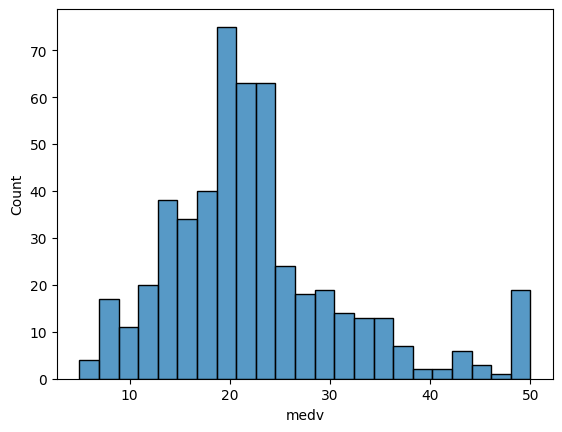

In [15]:
sns.histplot(data["medv"])

<Axes: ylabel='medv'>

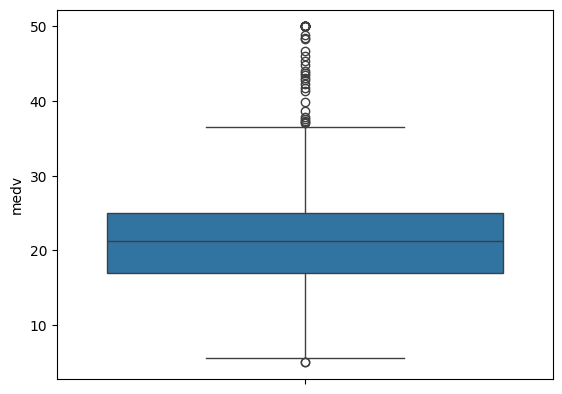

In [16]:
sns.boxplot(data["medv"])

In [17]:
from sklearn.preprocessing import StandardScaler
# Split the data into input and output variables
X = data.drop('medv', axis=1)
y =data['medv']
# Scale the input features
scaler =StandardScaler()
X =scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
# Splitthe data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [21]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])

x_val=X_train
y_val=y_train

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 608.1809 - mae: 22.7983 - val_loss: 602.4248 - val_mae: 22.6706
Epoch 2/20
1/1 [==============================] - 0s 63ms/step - loss: 602.4248 - mae: 22.6706 - val_loss: 596.5529 - val_mae: 22.5384
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 596.5529 - mae: 22.5384 - val_loss: 590.5619 - val_mae: 22.4021
Epoch 4/20
1/1 [==============================] - 0s 51ms/step - loss: 590.5619 - mae: 22.4021 - val_loss: 584.3777 - val_mae: 22.2601
Epoch 5/20
1/1 [==============================] - 0s 39ms/step - loss: 584.3777 - mae: 22.2601 - val_loss: 578.0144 - val_mae: 22.1127
Epoch 6/20
1/1 [==============================] - 0s 41ms/step - loss: 578.0144 - mae: 22.1127 - val_loss: 571.4350 - val_mae: 21.9589
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 571.4351 - mae: 21.9589 - val_loss: 564.5208 - val_mae: 21.7963
Epoch 8/20
1/1 [==============================] - 0s 42ms

In [25]:
results = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 355.5171 - mae: 16.7347
